Model Training

In [14]:
import numpy as np 
import pandas as pd 
import seaborn as snc
import matplotlib.pyplot as plt


from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings


In [15]:
df=pd.read_csv('data\student.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']
X,y

(     gender race_ethnicity parental_level_of_education         lunch  \
 0    female        group B           bachelor's degree      standard   
 1    female        group C                some college      standard   
 2    female        group B             master's degree      standard   
 3      male        group A          associate's degree  free/reduced   
 4      male        group C                some college      standard   
 ..      ...            ...                         ...           ...   
 995  female        group E             master's degree      standard   
 996    male        group C                 high school  free/reduced   
 997  female        group C                 high school  free/reduced   
 998  female        group D                some college      standard   
 999  female        group D                some college  free/reduced   
 
     test_preparation_course  reading_score  writing_score  
 0                      none             72             74  


In [21]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [23]:
    X = preprocessor.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [25]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [38]:
# Define your models dictionary correctly
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Loop through each model
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Assuming evaluate_model is defined elsewhere and returns: (mae, mse, r2)
    train_mae, train_mse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_r2 = evaluate_model(y_test, y_test_pred)

    # Save model name and test R² score
    model_list.append(name)
    r2_list.append(test_r2)

    # Print results
    print(f"{name}")
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_mse**0.5))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_mse**0.5))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))

    print("="*35)
    print("\n")


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.3041
- Mean Absolute Error: 4.2470
- R2 Score: 0.8796
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3294
- Mean Absolute Error: 4.2888
- R2 Score: 0.8590


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.6693
- Mean Absolute Error: 0.0362
- R2 Score: 0.9991
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.7576
- Mean Absolute Error: 6.1650
- R2 Score: 0.7231


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.5703
- Mean Absolute Error: 5.1753
- R2 Score: 0.8135
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.4852
- Mean Absolute Error: 5.0135
- R2 Score: 0.8174


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.3042
- Mean Absolute Error: 4.2448
- R2 Score: 0.8796
-------------------------------

In [39]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,Ridge,0.859539
0,Linear Regression,0.859028
7,CatBoost Regressor,0.842316
4,Random Forest,0.837159
8,AdaBoost Regressor,0.821304
2,Lasso,0.817371
6,XGBoost Regressor,0.800579
5,K-Neighbors Regressor,0.783747
1,Decision Tree,0.723146


In [40]:
ridge_mdl=Ridge()
mdl=ridge_mdl.fit(X_train,y_train)
mdl_y_pred=mdl.predict(X_test)
score=r2_score(y_test,mdl_y_pred)*100
print("the accuracy is :",score)

the accuracy is : 85.95389824406551


Text(0, 0.5, 'Predicted')

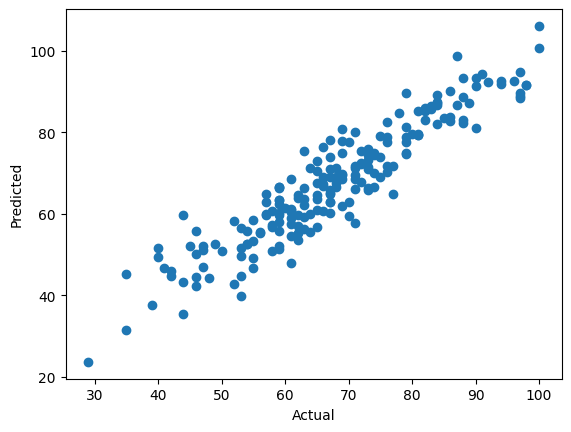

In [43]:
plt.scatter(y_test,mdl_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')